## Step 0 Load data and import packages

In [1]:
portfolio_a = ['SHY','TLT','VYM','EL','SHOP','SYK','POOL','SGOL']
portfolio_b = ['SHY','VYM','EL','SHOP','SYK','POOL']

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
np.random.seed(123)

# Turn on progress printing 
solvers.options['show_progress'] = False
import chart_studio.plotly
import plotly.tools as tls
# plotly.__version__

In [3]:
SHY = pd.read_csv('SHY.csv')[['Date','Close']]
TLT = pd.read_csv('TLT.csv')[['Date','Close']]
VYM = pd.read_csv('VYM.csv')[['Date','Close']]
EL = pd.read_csv('EL.csv')[['Date','Close']]
SHOP = pd.read_csv('SHOP.csv')[['Date','Close']]
SYK = pd.read_csv('SYK.csv')[['Date','Close']]
POOL = pd.read_csv('POOL.csv')[['Date','Close']]
# SGOL = pd.read_csv('SGOL.csv')[['Date','Close']]

In [4]:
SHY.set_index('Date',inplace = True)
TLT.set_index('Date',inplace = True)
VYM.set_index('Date',inplace = True)
EL.set_index('Date',inplace = True)
SHOP.set_index('Date',inplace = True)
SYK.set_index('Date',inplace = True)
POOL.set_index('Date',inplace = True)
# SGOL.set_index('Date',inplace = True)

In [5]:
SHY = SHY.rename({'Close':'SHY'},axis=1)
TLT = TLT.rename({'Close':'TLT'},axis=1)
VYM = VYM.rename({'Close':'VYM'},axis=1)
EL = EL.rename({'Close':'EL'},axis=1)
SHOP = SHOP.rename({'Close':'SHOP'},axis=1)
SYK = SYK.rename({'Close':'SYK'},axis=1)
POOL = POOL.rename({'Close':'POOL'},axis=1)
# SGOL = SGOL.rename({'Close':'SGOL'},axis=1)

## Step 1 Combine datasets, basic plotting, and mean-variance calculations

In [6]:
assets = pd.DataFrame()
assets = SHY.join(TLT,how='outer')
assets = assets.join(VYM,how='outer')
assets = assets.join(EL,how='outer')
assets = assets.join(SHOP,how='outer')
assets = assets.join(SYK,how='outer')
assets = assets.join(POOL,how='outer')
# assets = assets.join(SGOL,how='outer')
assets.head()

,SHY,TLT,VYM,EL,SHOP,SYK,POOL
Date,,,,,,,
2015-01-23,84.849998,134.770004,68.739998,73.699997,NaN,92.699997,64.779999
2015-01-26,84.800003,134.360001,68.900002,72.860001,NaN,92.550003,65.080002
2015-01-27,84.849998,134.570007,67.820000,71.750000,NaN,92.330002,64.709999
2015-01-28,84.910004,136.770004,67.139999,70.400002,NaN,92.750000,63.119999
2015-01-29,84.879997,135.869995,67.879997,71.970001,NaN,93.680000,63.880001


In [7]:
assets = assets[portfolio_b]

In [8]:
assets = assets.dropna()
assets.head()

,SHY,VYM,EL,SHOP,SYK,POOL
Date,,,,,,
2015-05-20,84.820000,70.430000,89.080002,17.000000,96.779999,68.809998
2015-05-21,84.849998,70.510002,89.349998,25.680000,96.400002,67.760002
2015-05-22,84.790001,70.209999,90.220001,28.309999,96.440002,67.599998
2015-05-26,84.800003,69.629997,88.480003,29.650000,95.529999,66.949997
2015-05-27,84.809998,70.110001,88.769997,27.500000,96.589996,68.010002


In [9]:
daily_return = assets.pct_change(1)
daily_return.head()

,SHY,VYM,EL,SHOP,SYK,POOL
Date,,,,,,
2015-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-21,0.000354,0.001136,0.003031,0.510588,-0.003926,-0.015259
2015-05-22,-0.000707,-0.004255,0.009737,0.102414,0.000415,-0.002361
2015-05-26,0.000118,-0.008261,-0.019286,0.047333,-0.009436,-0.009615
2015-05-27,0.000118,0.006894,0.003278,-0.072513,0.011096,0.015833


In [10]:
daily_return = daily_return.dropna()
daily_return.head()

,SHY,VYM,EL,SHOP,SYK,POOL
Date,,,,,,
2015-05-21,0.000354,0.001136,0.003031,0.510588,-0.003926,-0.015259
2015-05-22,-0.000707,-0.004255,0.009737,0.102414,0.000415,-0.002361
2015-05-26,0.000118,-0.008261,-0.019286,0.047333,-0.009436,-0.009615
2015-05-27,0.000118,0.006894,0.003278,-0.072513,0.011096,0.015833
2015-05-28,0.000472,0.000143,-0.003492,-0.001818,-0.003624,-0.002059


### Stock price path plotting

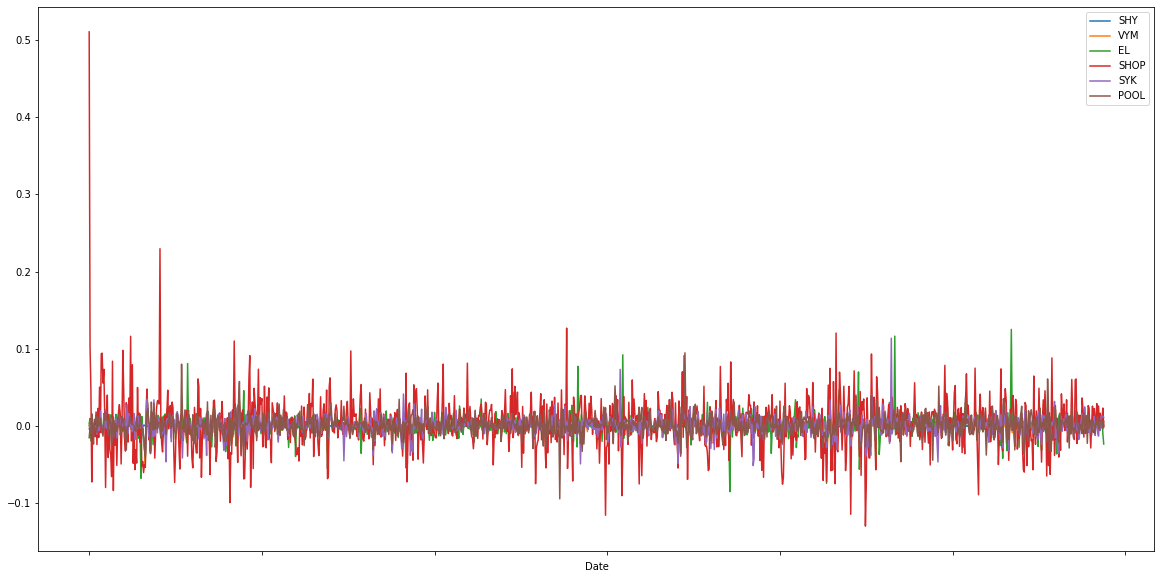

In [11]:
daily_return.plot(figsize=(20,10))

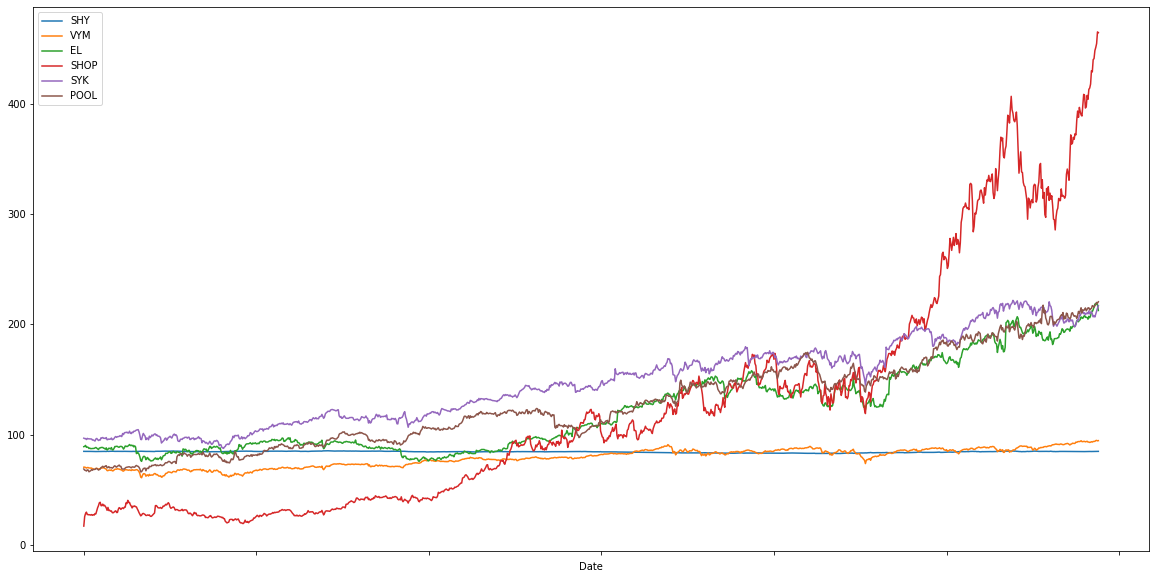

In [12]:
assets.plot(figsize=(20,10))

### Correlation Graph

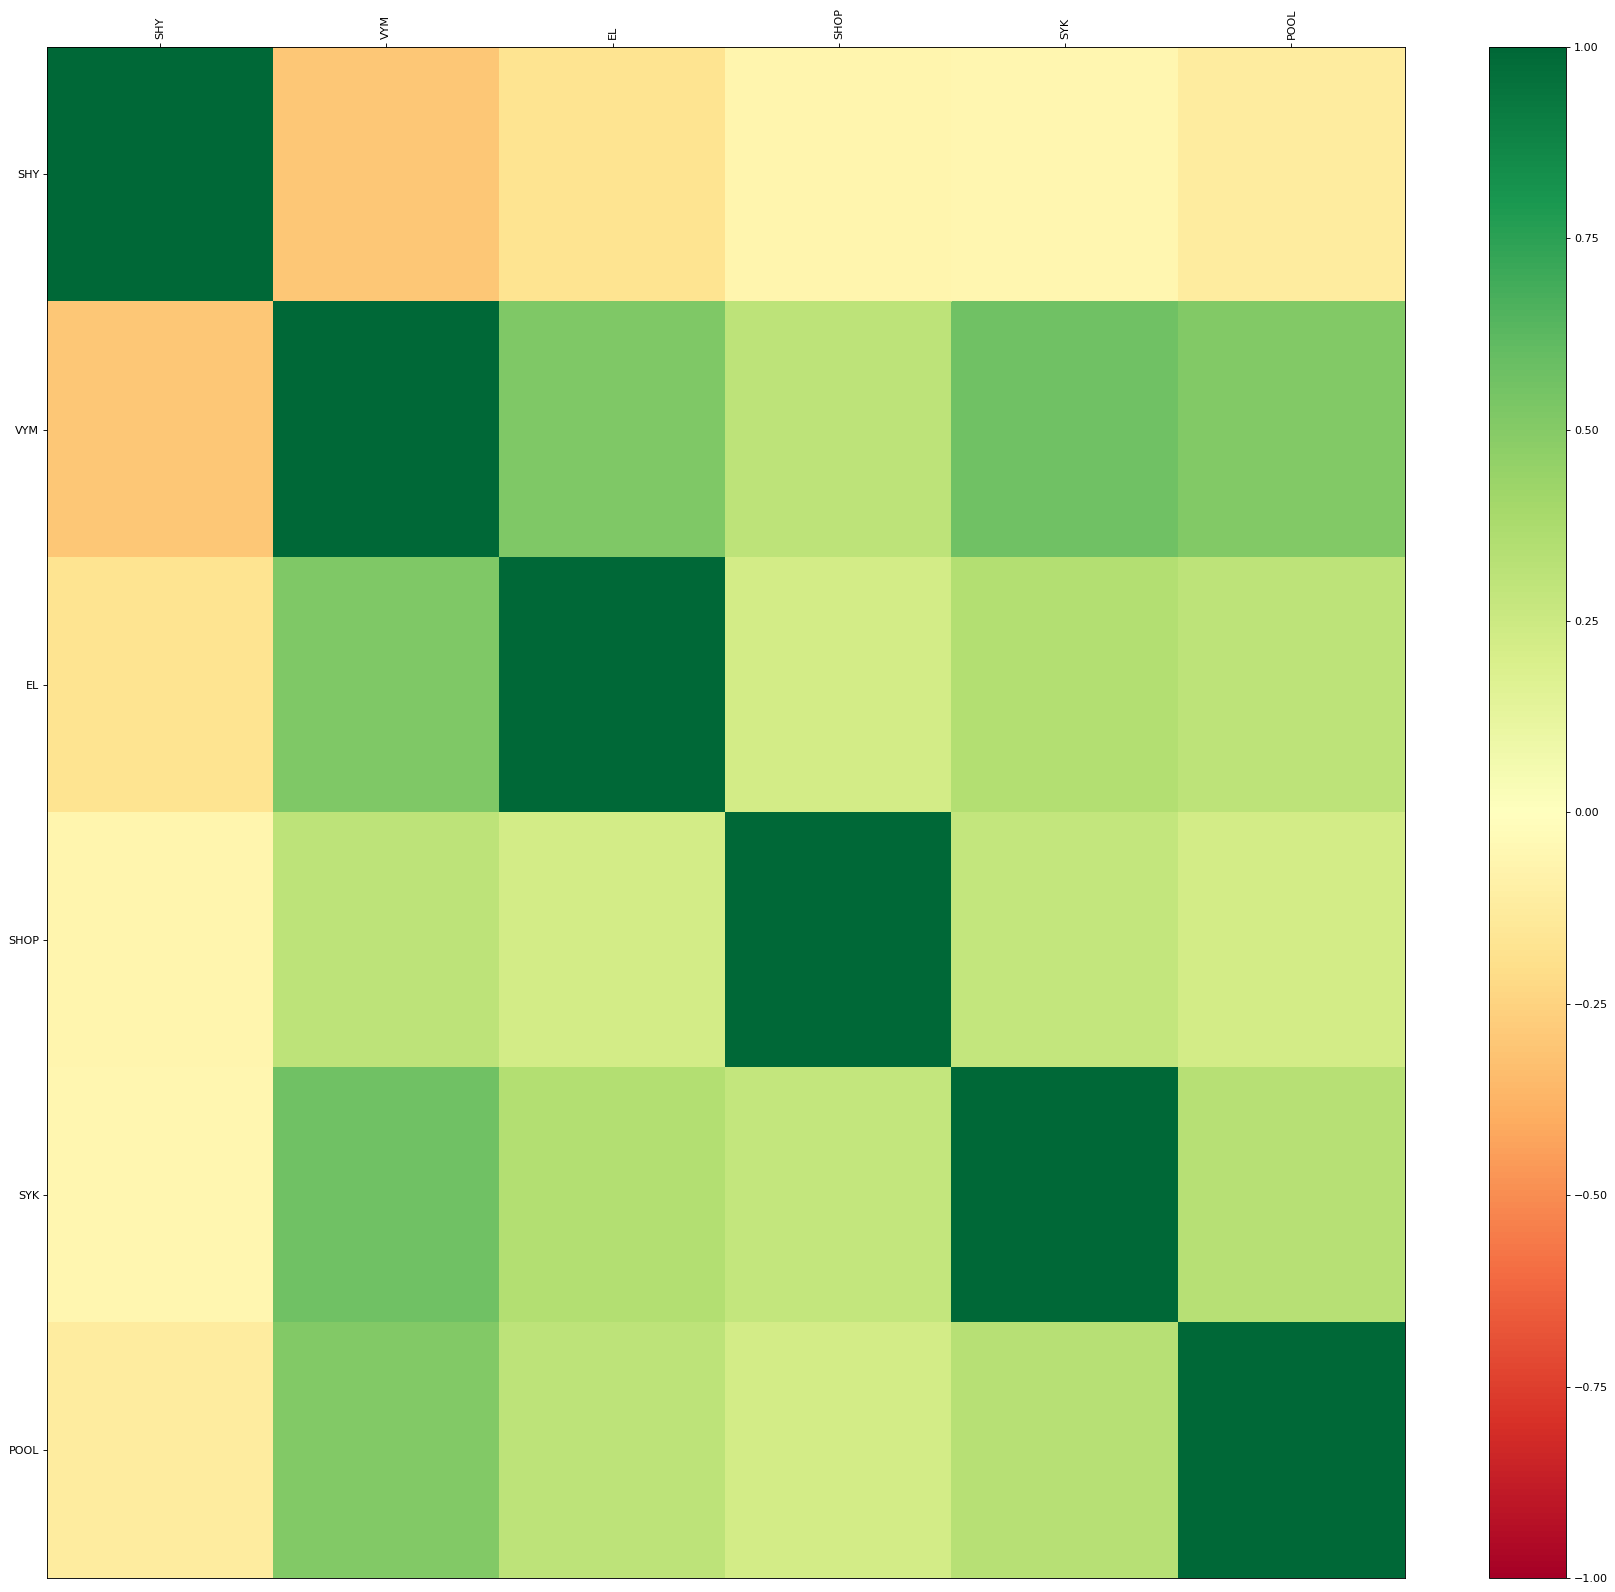

In [13]:
df_corr = daily_return.corr()
data = df_corr.values
fig  = plt.figure(figsize=(22, 20), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
heatmap = ax.pcolor(data,cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[1])+0.5,minor = False)
ax.set_yticks(np.arange(data.shape[0])+0.5,minor = False)
ax.invert_yaxis()
ax.xaxis.tick_top()
column_labels = df_corr.columns
row_labels = df_corr.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation = 90)
heatmap.set_clim(-1,1)
plt.tight_layout()
plt.show()

### Mean-Variance Calculations

In [14]:
np.set_printoptions(precision=2)

In [15]:
for asset in daily_return.columns:
    print("The mean return of {} is {}. The volatility of {} is {}".format(asset,np.mean(daily_return[asset]),asset,np.var(daily_return[asset])))

The mean return of SHY is 1.241494580317075e-07. The volatility of SHY is 4.4881386470773917e-07
The mean return of VYM is 0.0002809658089210984. The volatility of VYM is 6.098105268852669e-05
The mean return of EL is 0.000844155296044327. The volatility of EL is 0.00020958213754659509
The mean return of SHOP is 0.0033873886381780545. The volatility of SHOP is 0.001199877091735456
The mean return of SYK is 0.0007639823640289643. The volatility of SYK is 0.00015397761331017955
The mean return of POOL is 0.0010794733747929168. The volatility of POOL is 0.00017710468451907023


In [16]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(daily_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(daily_return.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [17]:
num_ports = 6000
all_weights = np.zeros((num_ports, len(assets.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(portfolio_b)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (daily_return.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(daily_return.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [18]:
print('Max Sharpe Ratio in the array: {}'.format(sharpe_arr.max()))
print('Its location in the array: {}'.format(sharpe_arr.argmax()))

Max Sharpe Ratio in the array: 1.8670975895568345
Its location in the array: 321


In [19]:
print(all_weights[5560,:])

[0.14 0.22 0.14 0.11 0.22 0.17]


In [20]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

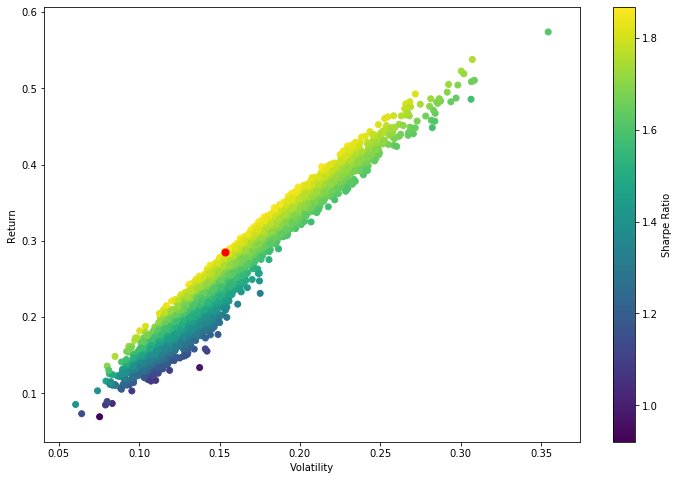

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [22]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(daily_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(daily_return.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [23]:
cons = ({'type':'eq','fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess = [1/len(portfolio_b),1/len(portfolio_b),1/len(portfolio_b),1/len(portfolio_b),
              1/len(portfolio_b),1/len(portfolio_b)]

In [24]:
from scipy.optimize import minimize
opt_results = minimize(neg_sharpe,init_guess,method = 'SLSQP',bounds = bounds,constraints = cons)
print(opt_results)

     fun: -1.889781318527786
     jac: array([-1.59e-04,  1.07e+00, -7.04e-04,  4.84e-03, -2.28e-03, -7.33e-04])
 message: 'Optimization terminated successfully.'
    nfev: 146
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.74, 0.  , 0.04, 0.07, 0.04, 0.12])


In [25]:
get_ret_vol_sr(opt_results.x)

array([0.1 , 0.05, 1.89])

In [26]:
frontier_y = np.linspace(0,0.3,200)

In [27]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [28]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

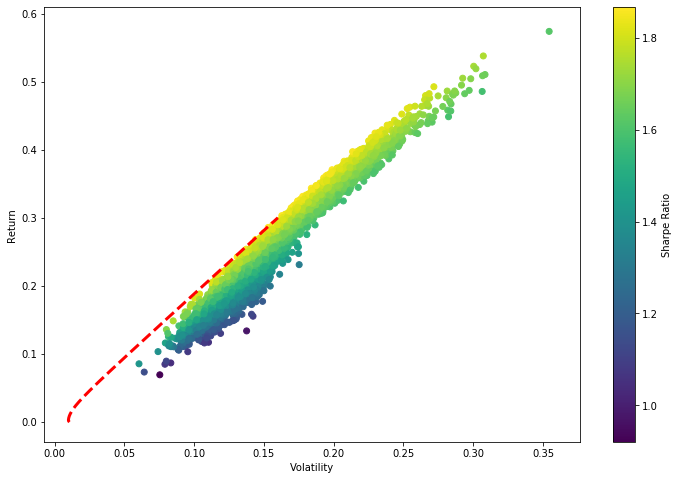

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('efficient_frontier.png')
plt.show()

In [30]:
for i in range(len(portfolio_b)):
    print("The weight for {} is {}. ".format(portfolio_b[i],opt_results.x[i]))

The weight for SHY is 0.7370269499913478. 
The weight for VYM is 0.0. 
The weight for EL is 0.04427521039327114. 
The weight for SHOP is 0.06505149394611764. 
The weight for SYK is 0.0356416920065628. 
The weight for POOL is 0.11800465366270102. 
